In [164]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal  #or xaiver/Hae normilization



# LOAD LIBRARIES
# USE KERAS WITH DEFAULT TENSORFLOW BACKEND
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import LearningRateScheduler

In [165]:
objects = mnist
(X_train, Y_train), (X_test, Y_test)=objects.load_data()

In [166]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


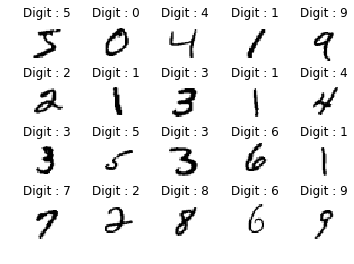

In [167]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(Y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [168]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [169]:
X_train = X_train/255
X_test = X_test/255

# here we are having a class number for each image
print("Class label of first image :", Y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(Y_train, 10) #one hot incoding
Y_test = np_utils.to_categorical(Y_test, 10)#one hot incoding

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [170]:
input_dim = X_train.shape[1]
input_dim

output_dim = 10
batch_size = 128 
nb_epoch = 5

In [14]:
def new_mlp (hiddens):
    mlp = Sequential()

    mlp.add(Flatten(input_shape = (28,28)))
    
    for size in hiddens:
        mlp.add(Dense(size,activation='relu'))
    
    mlp.add(Dense(10,activation='softmax'))

    mlp.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return mlp

In [76]:
mlp = new_mlp ([32,32])

In [77]:
start_time = time.time()
mlp.fit(X_train,Y_train,epochs=10)
print("Training time: %s seconds" % round((time.time() - start_time),2))

Epoch 1/10
1875/1875 [==============================] - 3s 982us/step - loss: 0.6205 - accuracy: 0.8149
Epoch 2/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.1796 - accuracy: 0.9466
Epoch 3/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.1321 - accuracy: 0.9595
Epoch 4/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.1071 - accuracy: 0.9671
Epoch 5/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.0928 - accuracy: 0.9726
Epoch 6/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.0811 - accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0725 - accuracy: 0.9779
Epoch 8/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.0648 - accuracy: 0.9793
Epoch 9/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.0606 - accuracy: 0.9817
Epoch 10/10
1875/1875 [==============================] - 2s 882u

In [78]:
lossAcc = mlp.evaluate(X_test,Y_test,verbose=2)

313/313 - 0s - loss: 0.1043 - accuracy: 0.9700


In [70]:
def test_hidden(hiddens, num_epochs):
    test_mlp = new_mlp(hiddens)
    test_mlp.fit(X_train,Y_train,epochs=num_epochs)
    return test_mlp.evaluate(X_test,Y_test,verbose=2)

In [72]:
start_time = time.time()
bestAccuracy = 0
bestAccuracyX = 1
for x in range(100):
    result = test_hidden([x+1,x+1],10)
    if(result[1] > bestAccuracy):
        bestAccuracyX = x + 1
        bestAccuracy = result[1]
        
print('Best accuracy:',bestAccuracy)
print('With 2 hidden layers of',bestAccuracyX,'neurons')
print("Test Total time: %s seconds" % round((time.time() - start_time),2))

Epoch 1/10
1875/1875 [==============================] - 2s 867us/step - loss: 2.3019 - accuracy: 0.1108
Epoch 2/10
1875/1875 [==============================] - 1s 719us/step - loss: 2.3008 - accuracy: 0.1141
Epoch 3/10
1875/1875 [==============================] - 1s 749us/step - loss: 2.3013 - accuracy: 0.1125
Epoch 4/10
1875/1875 [==============================] - 1s 684us/step - loss: 2.3014 - accuracy: 0.1126
Epoch 5/10
1875/1875 [==============================] - 1s 743us/step - loss: 2.3018 - accuracy: 0.1106
Epoch 6/10
1875/1875 [==============================] - 1s 749us/step - loss: 2.3013 - accuracy: 0.1131
Epoch 7/10
1875/1875 [==============================] - 1s 666us/step - loss: 2.3014 - accuracy: 0.1112
Epoch 8/10
1875/1875 [==============================] - 1s 664us/step - loss: 2.3015 - accuracy: 0.1110
Epoch 9/10
1875/1875 [==============================] - 1s 729us/step - loss: 2.3012 - accuracy: 0.1119
Epoch 10/10
1875/1875 [==============================] - 1s 702u

Epoch 1/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.7781 - accuracy: 0.7673
Epoch 2/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.2411 - accuracy: 0.9307
Epoch 3/10
1875/1875 [==============================] - 1s 717us/step - loss: 0.2065 - accuracy: 0.9404
Epoch 4/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.1885 - accuracy: 0.9464
Epoch 5/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.1753 - accuracy: 0.9493
Epoch 6/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.1614 - accuracy: 0.9521
Epoch 7/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.1546 - accuracy: 0.9547
Epoch 8/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.1485 - accuracy: 0.9571
Epoch 9/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1381 - accuracy: 0.9592
Epoch 10/10
1875/1875 [==============================] - 1s 747u

Epoch 1/10
1875/1875 [==============================] - 3s 933us/step - loss: 0.6088 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.1910 - accuracy: 0.9431
Epoch 3/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.1435 - accuracy: 0.9567
Epoch 4/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.1211 - accuracy: 0.9632
Epoch 5/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.1049 - accuracy: 0.9678
Epoch 6/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.0942 - accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.0834 - accuracy: 0.9738
Epoch 8/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.0725 - accuracy: 0.9780
Epoch 9/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.0652 - accuracy: 0.9796
Epoch 10/10
1875/1875 [==============================] - 2s 831u

1875/1875 [==============================] - 2s 836us/step - loss: 0.0348 - accuracy: 0.9887
313/313 - 1s - loss: 0.0983 - accuracy: 0.9730
Epoch 1/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.5556 - accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.1460 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.1050 - accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.0828 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0694 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.0587 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.0513 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.0427 - accuracy: 0.9866
Epoch 9/10
1875/1875 [======

1875/1875 [==============================] - 2s 848us/step - loss: 0.0392 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.0322 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.0284 - accuracy: 0.9907
Epoch 10/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.0243 - accuracy: 0.9921
313/313 - 0s - loss: 0.0992 - accuracy: 0.9741
Epoch 1/10
1875/1875 [==============================] - 3s 961us/step - loss: 0.4777 - accuracy: 0.8627
Epoch 2/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.1272 - accuracy: 0.9610
Epoch 3/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.0878 - accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.0707 - accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.0558 - accuracy: 0.9819
Epoch 6/10
1875/1875 [=====

1875/1875 [==============================] - 2s 888us/step - loss: 0.0449 - accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.0378 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.0288 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0245 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.0223 - accuracy: 0.9924
313/313 - 0s - loss: 0.0961 - accuracy: 0.9762
Epoch 1/10
1875/1875 [==============================] - 3s 985us/step - loss: 0.4641 - accuracy: 0.8621
Epoch 2/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.1272 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0891 - accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.0689 - accuracy: 0.9775
Epoch 5/10
1875/1875 [=====

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4669 - accuracy: 0.8724 - ETA: 0s - loss: 0.4750 - accuracy: 0.
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1201 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.0816 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0613 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.0459 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.0372 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.0303 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.0254 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0213 - accuracy: 0.9928
Epoch 10/10
1875/1875 [=====

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4314 - accuracy: 0.8724
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1082 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0735 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0531 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0414 - accuracy: 0.9869: 0s - los
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0175

In [52]:
nets = 5
model = [0] *nets
for j in range(nets):
    
    model[j] = Sequential()
    
    if (j == 0):
        model[j].add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
        model[j].add(Dense(32, activation='sigmoid'))
        model[j].add(Dense(10, activation='softmax'))
        model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    if (j == 1):
        model[j].add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
        model[j].add(Dense(32, activation='sigmoid'))
        model[j].add(Dense(10, activation='softmax'))
        model[j].compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

    if (j == 2):
        model[j].add(Dense(64, activation='relu', input_shape=(input_dim,)))
        model[j].add(Dense(32, activation='relu'))
        model[j].add(Dense(10, activation='softmax'))
        model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    if (j == 3):
        model[j].add(Dense(64, activation='relu', input_shape=(input_dim,)))
        model[j].add(Dense(32, activation='relu'))
        model[j].add(Dense(10, activation='softmax'))
        model[j].compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

    if (j == 4):
        model[j].add(Dense(64, activation='relu', input_shape=(input_dim,)))
        model[j].add(Dense(32, activation='sigmoid'))
        model[j].add(Dense(10, activation='softmax'))
        model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        
    model[j].summary()


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 64)                1856      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 10)                330       
Total params: 4,266
Trainable params: 4,266
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 64)                1856      
_________________________________________________________________
dense_103 (Dense)            (None, 32)                2080      
____________________________

In [124]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_156 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_157 (Dense)            (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [125]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 2.3009 - accuracy: 0.1581 - val_loss: 2.2235 - val_accuracy: 0.3147
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.2042 - accuracy: 0.3986 - val_loss: 2.1269 - val_accuracy: 0.5417
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.1002 - accuracy: 0.5595 - val_loss: 1.9898 - val_accuracy: 0.6165
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 1.9525 - accuracy: 0.6349 - val_loss: 1.7983 - val_accuracy: 0.6655
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 1.7538 - accuracy: 0.6719 - val_loss: 1.5675 - val_accuracy: 0.7105


In [171]:
model_A = Sequential()

model_A.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_A.add(Dense(32, activation='sigmoid'))
model_A.add(Dense(10, activation='softmax'))
model_A.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [172]:
model_B = Sequential()

model_B.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_B.add(Dense(32, activation='sigmoid'))
model_B.add(Dense(10, activation='softmax'))
model_B.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [173]:
model_C = Sequential()

model_C.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_C.add(Dense(32, activation='relu'))
model_C.add(Dense(10, activation='softmax'))
model_C.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [174]:
model_D = Sequential()   

model_D.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_D.add(Dense(32, activation='relu'))
model_D.add(Dense(10, activation='softmax'))
model_D.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [175]:
model_E = Sequential()

model_E.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_E.add(Dense(32, activation='sigmoid'))
model_E.add(Dense(10, activation='softmax'))
model_E.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [67]:
# DECREASE LEARNING RATE BY 0.95 EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# TRAIN CNNs AND DISPLAY ACCURACIES
start_time = time.time()
epochs_num = 3
history = [0] * nets
results = [0] * nets
for j in range(nets):
    history = model[j].fit(X_train, Y_train, epochs=epochs_num, verbose=1)
    ##making 10% validation sizes
    ##history[j] = model[j].fit(X_train2, Y_train2, epochs=epochs, callbacks=[annealer], verbose=1)
    
    ##X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    ##history[j] = model[j].fit(X_train2, Y_train2, epochs=epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=1)

    
    # PREDICT DIGITS FOR CNN J ON MNIST 10K TEST
    results[j] = model[j].predict(X_test)
    results2 = np.argmax(results[j],axis = 1)

    # CALCULATE ACCURACY OF CNN J ON MNIST 10K TEST
    c=0
    for i in range(10000):
        if results2[i]!=y_test[i]:
            c +=1
    print("CNN %d: Test accuracy = %f" % (j+1,1-c/10000.))

Epoch 1/3


ValueError: in user code:

    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:1631 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 10) and (32, 28, 10) are incompatible


Epoch 1/30
1875/1875 [==============================] - 3s 991us/step - loss: 1.0758 - accuracy: 0.7474 - val_loss: 0.2598 - val_accuracy: 0.9303
Epoch 2/30
1875/1875 [==============================] - 2s 860us/step - loss: 0.2376 - accuracy: 0.9333 - val_loss: 0.1833 - val_accuracy: 0.9469
Epoch 3/30
1875/1875 [==============================] - 2s 858us/step - loss: 0.1691 - accuracy: 0.9514 - val_loss: 0.1449 - val_accuracy: 0.9572
Epoch 4/30
1875/1875 [==============================] - 2s 864us/step - loss: 0.1282 - accuracy: 0.9638 - val_loss: 0.1227 - val_accuracy: 0.9634
Epoch 5/30
1875/1875 [==============================] - 2s 862us/step - loss: 0.1019 - accuracy: 0.9697 - val_loss: 0.1078 - val_accuracy: 0.9671
Epoch 6/30
1875/1875 [==============================] - 2s 861us/step - loss: 0.0848 - accuracy: 0.9758 - val_loss: 0.1015 - val_accuracy: 0.9699
Epoch 7/30
1875/1875 [==============================] - 2s 862us/step - loss: 0.0745 - accuracy: 0.9791 - val_loss: 0.0969 -

1875/1875 [==============================] - 1s 771us/step - loss: 0.2631 - accuracy: 0.9245 - val_loss: 0.2555 - val_accuracy: 0.9276
Epoch 27/30
1875/1875 [==============================] - 1s 773us/step - loss: 0.2614 - accuracy: 0.9250 - val_loss: 0.2508 - val_accuracy: 0.9307
Epoch 28/30
1875/1875 [==============================] - 1s 768us/step - loss: 0.2506 - accuracy: 0.9274 - val_loss: 0.2458 - val_accuracy: 0.9306
Epoch 29/30
1875/1875 [==============================] - 1s 769us/step - loss: 0.2515 - accuracy: 0.9279 - val_loss: 0.2416 - val_accuracy: 0.9321
Epoch 30/30
1875/1875 [==============================] - 1s 772us/step - loss: 0.2455 - accuracy: 0.9293 - val_loss: 0.2387 - val_accuracy: 0.9324
Test score: 0.2386607974767685
Test accuracy: 0.9323999881744385
Epoch 1/30
1875/1875 [==============================] - 3s 981us/step - loss: 0.5377 - accuracy: 0.8443 - val_loss: 0.1566 - val_accuracy: 0.9532
Epoch 2/30
1875/1875 [==============================] - 2s 854us/s

1875/1875 [==============================] - 1s 764us/step - loss: 0.0761 - accuracy: 0.9787 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 22/30
1875/1875 [==============================] - 1s 762us/step - loss: 0.0725 - accuracy: 0.9789 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 23/30
1875/1875 [==============================] - 1s 763us/step - loss: 0.0667 - accuracy: 0.9804 - val_loss: 0.1021 - val_accuracy: 0.9695
Epoch 24/30
1875/1875 [==============================] - 1s 762us/step - loss: 0.0676 - accuracy: 0.9809 - val_loss: 0.0997 - val_accuracy: 0.9695
Epoch 25/30
1875/1875 [==============================] - 1s 762us/step - loss: 0.0634 - accuracy: 0.9828 - val_loss: 0.0982 - val_accuracy: 0.9710
Epoch 26/30
1875/1875 [==============================] - 1s 760us/step - loss: 0.0592 - accuracy: 0.9836 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 27/30
1875/1875 [==============================] - 1s 768us/step - loss: 0.0565 - accuracy: 0.9839 - val_loss: 0.1012 - val_

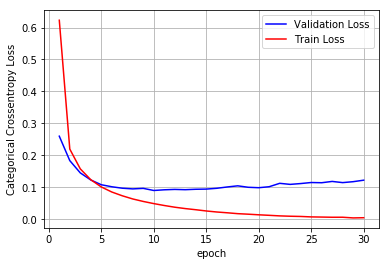

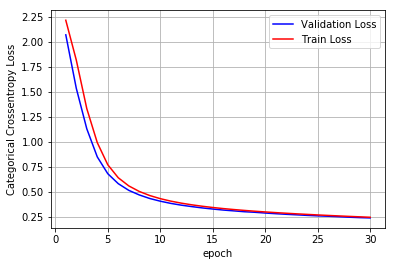

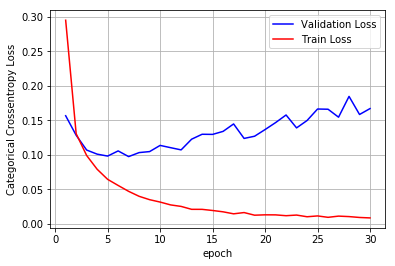

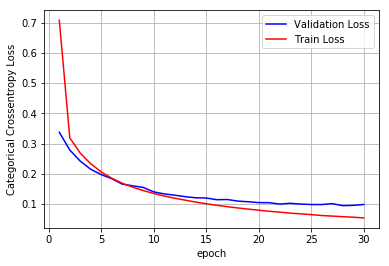

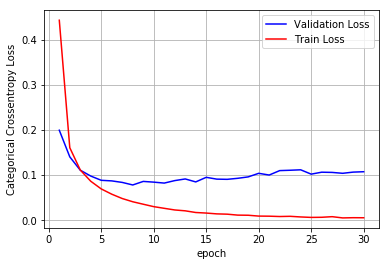

In [176]:
# DECREASE LEARNING RATE BY 0.95 EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# TRAIN CNNs AND DISPLAY ACCURACIES
start_time = time.time()
epochs_num = 30
history = [0] * nets
results = [0] * nets

history[0] = model_A.fit(X_train, Y_train, epochs=epochs_num, verbose=1, validation_data=(X_test, Y_test))
results[0] = model_A.predict(X_test)
results2 = np.argmax(results[0],axis = 1)
score = model_A.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[0].history['val_loss']
ty = history[0].history['loss']
plt_dynamic(x, vy, ty, ax)



history[1] = model_B.fit(X_train, Y_train, epochs=epochs_num, verbose=1, validation_data=(X_test, Y_test))
results[1] = model_B.predict(X_test)
results2 = np.argmax(results[1],axis = 1)
score = model_B.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[1].history['val_loss']
ty = history[1].history['loss']
plt_dynamic(x, vy, ty, ax)


history[2] = model_C.fit(X_train, Y_train, epochs=epochs_num, verbose=1, validation_data=(X_test, Y_test))
results[2] = model_C.predict(X_test)
results2 = np.argmax(results[2],axis = 1)
score = model_C.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[2].history['val_loss']
ty = history[2].history['loss']
plt_dynamic(x, vy, ty, ax)



history[3] = model_D.fit(X_train, Y_train, epochs=epochs_num, verbose=1, validation_data=(X_test, Y_test))
results[3] = model_D.predict(X_test)
results2 = np.argmax(results[3],axis = 1)
score = model_D.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[3].history['val_loss']
ty = history[3].history['loss']
plt_dynamic(x, vy, ty, ax)


history[4] = model_E.fit(X_train, Y_train, epochs=epochs_num, verbose=1, validation_data=(X_test, Y_test))
results[4] = model_E.predict(X_test)
results2 = np.argmax(results[4],axis = 1)
score = model_E.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[4].history['val_loss']
ty = history[4].history['loss']
plt_dynamic(x, vy, ty, ax)

In [177]:
# PREDICT DIGITS FOR ENSEMBLE ON MNIST 10K TEST
results2 = np.zeros( (X_test.shape[0],10) )
for j in range(nets):
    results2 = results2 + results[j]
results2 = np.argmax(results2,axis = 1)
 
# CALCULATE ACCURACY OF ENSEMBLE ON MNIST 10K TEST SET    
c=0
for i in range(10000):
    index_of_y = np.where(Y_test[i] == 1)
    if results2[i]!=int(index_of_y[0]):
        c +=1
print("Ensemble Accuracy = %f" % (1-c/10000.))

Ensemble Accuracy = 0.980900
